# Conjugate gradient solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Try out the conjugate gradient method

In [2]:
def conjgrad(A, b, x = None, niter = 20):
    # Find a solution to Ax=b

    # If there is no initial guess, create one
    if x is None:
        x = 0*b

    # Calculate first residual r_0 and set p_0 equal to it
    r = b - A@x
    p = r.copy()

    # Keep track of the size of the residual and
    # exit early if it gets small enough
    rr = r@r

    for i in range(niter):
        Ap = A@p
        pAp = p@Ap
        alpha = rr / pAp
        x = x + alpha*p
        r = r - alpha*Ap

        rr_new = r@r
        beta = rr_new / rr
        p = r + beta*p

        rr = rr_new
        print('Iteration %d: pAp = %lg, residual=%lg' % (i, pAp, rr**0.5))

    return x

In [3]:
n = 1000
A = np.random.rand(n,n)
A = A@A.T
# Adding a diagonal component reduces the range of singular values, converges faster
A = A + np.diag(n * np.ones(n))

print('Matrix condition number =', np.linalg.cond(A))

b = np.random.randn(n)

x = conjgrad(A, b, niter = 20)

print('Max error = ', np.max(np.abs(b-A@x)))

Matrix condition number = 251.27249667362318
Iteration 0: pAp = 1.32784e+06, residual=186.983
Iteration 1: pAp = 7.16622e+09, residual=2.31881
Iteration 2: pAp = 6180.65, residual=0.15883
Iteration 3: pAp = 29.3405, residual=0.0117783
Iteration 4: pAp = 0.161341, residual=0.000848406
Iteration 5: pAp = 0.000839715, residual=9.04718e-05
Iteration 6: pAp = 0.00106833, residual=8.66283e-05
Iteration 7: pAp = 1.68545e-05, residual=4.63837e-06
Iteration 8: pAp = 2.49881e-08, residual=3.16472e-07
Iteration 9: pAp = 1.14783e-10, residual=2.18164e-08
Iteration 10: pAp = 5.50834e-13, residual=1.59086e-09
Iteration 11: pAp = 3.57445e-15, residual=9.00945e-09
Iteration 12: pAp = 1.66961e-11, residual=1.09224e-10
Iteration 13: pAp = 1.38687e-17, residual=8.01771e-12
Iteration 14: pAp = 7.49373e-20, residual=5.60995e-13
Iteration 15: pAp = 3.65244e-22, residual=3.98153e-14
Iteration 16: pAp = 1.84057e-24, residual=1.1552e-14
Iteration 17: pAp = 3.14509e-23, residual=2.95542e-15
Iteration 18: pAp = 

## Application to Laplace's equation

In [4]:
def set_bcs(n):
    # Create a mask to set the boundary points
    # (following https://github.com/sievers/phys512-2022/tree/master/pdes )
    mask = np.zeros([n,n],dtype='bool')
    x = np.linspace(-1,1,n)
    xsqr = np.outer(x**2,np.ones(n))
    rsqr = xsqr+xsqr.T
    R = 0.1
    mask[rsqr<R**2] = True
    mask[:,0] = True
    mask[0,:] = True
    mask[-1,:] = True
    mask[:,-1] = True
    bc = np.zeros([n,n])
    bc[mask] = 0.0
    bc[rsqr<R**2] = 1.0
    return mask, bc

def set_bcs_capacitor(n):
    mask = np.zeros([n,n],dtype='bool')
    x1 = 3*n//8
    x2 = n-x1
    mask[:, x2] = True
    mask[:, x1] = True
    bc = np.zeros([n,n])
    bc[:, x2] = 1.0
    bc[:, x1] = -1.0
    mask[:,0] = True
    mask[0,:] = True
    mask[-1,:] = True
    mask[:,-1] = True
    return mask, bc

In [5]:
def conjgrad_laplace(x, b, n, mask, niter = 20):
    # Find a solution to Ax=b

    # Calculate first residual r_0 and set p_0 equal to it
    r = b - Ax(x, n, mask)
    p = r.copy()

    rr = r@r

    delta_x = np.zeros(niter)
    for i in range(niter):
        Ap = Ax(p, n, mask)
        pAp = p@Ap
        alpha = rr / pAp
        x = x + alpha*p
        r = r - alpha*Ap

        # keep track of how much x changes as a measure of convergence
        delta_x[i] = np.max(np.abs(alpha*p))

        rr_new = r@r
        beta = rr_new / rr
        p = r + beta*p

        rr = rr_new
        if i%(niter//10) == 0:
            print('Iteration %d: pAp = %lg, residual=%lg' % (1+i, pAp, rr**0.5))

    if i%(niter//10):
        print('Iteration %d: pAp = %lg, residual=%lg' % (1+i, pAp, rr**0.5))
    
    return x, delta_x

def Ax(x, n, mask):
    V = x.copy()
    V = V.reshape((n,n))
    # We set the boundary values to zero so that boundary points do not contribute to the
    # averaging. This is taken care of by the b vector
    V[mask] = 0
    Vnew = V - 0.25 * (np.roll(V,1,0) + np.roll(V,-1,0) + 
                       np.roll(V,1,1) + np.roll(V,-1,1))
    Vnew[mask] = 0
    Vnew = Vnew.reshape(n*n)
    return Vnew

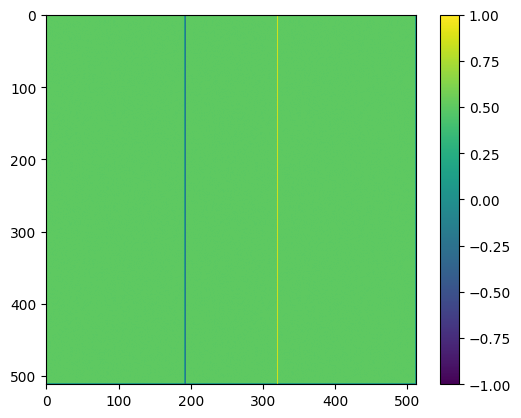

Iteration 1: pAp = 96, residual=6.92695
Iteration 103: pAp = 0.0158729, residual=0.169523
Iteration 205: pAp = 0.00236602, residual=0.0700791
Iteration 307: pAp = 0.000195086, residual=0.0210845
Iteration 409: pAp = 8.01209e-06, residual=0.00424184
Iteration 511: pAp = 9.59754e-08, residual=0.000430214
Iteration 613: pAp = 4.20298e-09, residual=8.51102e-05
Iteration 715: pAp = 1.85836e-10, residual=1.84348e-05
Iteration 817: pAp = 4.72007e-12, residual=2.89834e-06
Iteration 919: pAp = 9.69988e-13, residual=1.32976e-06
Iteration 1021: pAp = 1.58396e-14, residual=1.64154e-07
Iteration 1024: pAp = 1.46728e-14, residual=1.57431e-07


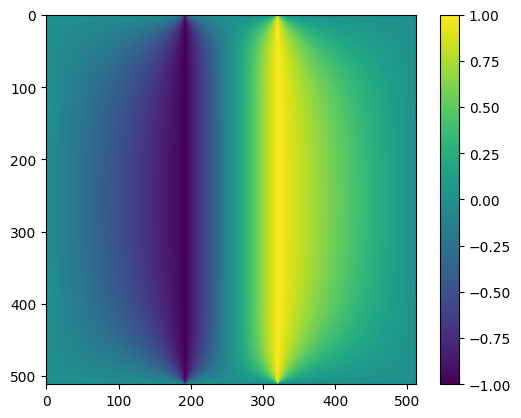

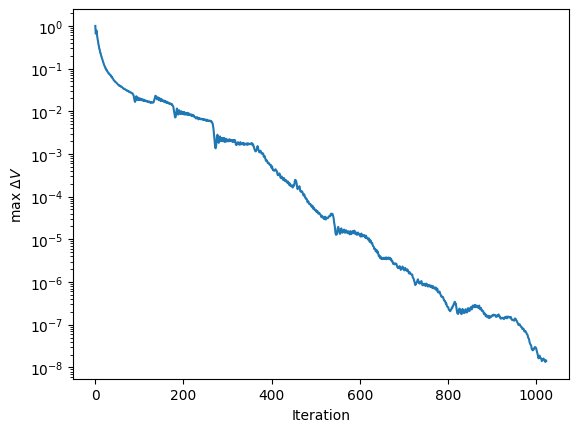

In [6]:
# Solve Laplace's equation with conjugate gradient
n = 512
mask, bc = set_bcs_capacitor(n)
#mask, bc = set_bcs(n)

# Initial guess for the potential 
V = np.zeros([n,n]) + 0.5
V[mask] = bc[mask]

plt.imshow(V)
plt.colorbar()
plt.show()

# The matrix bc has zeros in the interior points and the boundary condition
# values in the boundary points. We calculate the part of the averaging 
# that includes the boundary separately and then move it onto the right hand side
# as our b vector
b = 0.25 * (np.roll(bc,1,axis=0)+np.roll(bc,-1,axis=0)+
            np.roll(bc,1,axis=1)+np.roll(bc,-1,axis=1))
b[mask] = 0
b = b.reshape(n*n)

# This is the initial guess for the potential
x = V.reshape(n*n)

# Solve and then reshape into a 2D grid
x, delta_x = conjgrad_laplace(x, b, n, mask, niter = 2*n)
V = x.reshape((n,n))

plt.clf()
plt.imshow(V)
plt.colorbar()
plt.show()

plt.clf()
plt.plot(np.arange(len(delta_x)), delta_x)
plt.ylabel(r'max $\Delta V$')
plt.xlabel(r'Iteration')
plt.yscale('log')
#plt.xscale('log')
plt.show()

The convergence is exponential.